# Dataset Preparation and Exploration

In [1]:
# Import Libraries
import os
import gc
import shutil
import cv2
import numpy as np 
import pandas as pd
from tqdm import tqdm
tqdm.pandas()
import warnings
warnings.filterwarnings("ignore")

# Data Visualization
from glob import glob
import xml.etree.ElementTree as xet
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from IPython.display import Image, display

# GPU
import torch
from numba import cuda

In [2]:
path = glob('/kaggle/input/indian-vehicle-dataset/google_images/*.xml')
print(len(path))


labels_dict = dict(filepath=[],xmin=[],xmax=[],ymin=[],ymax=[], plate_number=[])

for filename in path:

    info = xet.parse(filename)
    root = info.getroot()
    member_object = root.find('object')
    plate_number = str(member_object.find('name').text)
    labels_info = member_object.find('bndbox')
    xmin = int(labels_info.find('xmin').text)
    xmax = int(labels_info.find('xmax').text)
    ymin = int(labels_info.find('ymin').text)
    ymax = int(labels_info.find('ymax').text)

    labels_dict['filepath'].append(filename)
    labels_dict['xmin'].append(xmin)
    labels_dict['xmax'].append(xmax)
    labels_dict['ymin'].append(ymin)
    labels_dict['ymax'].append(ymax)
    labels_dict['plate_number'].append(plate_number)

440


In [3]:
new_paths = glob('/kaggle/input/indian-vehicle-dataset/State-wise_OLX/*/*.xml')
print(len(new_paths))


new_labels_dict = dict(filepath=[],xmin=[],xmax=[],ymin=[],ymax=[], plate_number=[])

for filename in new_paths:

    info = xet.parse(filename)
    root = info.getroot()
    member_object = root.find('object')
    plate_number = str(member_object.find('name').text)
    labels_info = member_object.find('bndbox')
    xmin = int(labels_info.find('xmin').text)
    xmax = int(labels_info.find('xmax').text)
    ymin = int(labels_info.find('ymin').text)
    ymax = int(labels_info.find('ymax').text)

    new_labels_dict['filepath'].append(filename)
    new_labels_dict['xmin'].append(xmin)
    new_labels_dict['xmax'].append(xmax)
    new_labels_dict['ymin'].append(ymin)
    new_labels_dict['ymax'].append(ymax)
    new_labels_dict['plate_number'].append(plate_number)

603


In [4]:
df = pd.DataFrame(labels_dict)
df.to_csv('labels.csv',index=False)
df.head()

,filepath,xmin,xmax,ymin,ymax,plate_number
0,/kaggle/input/indian-vehicle-dataset/google_im...,29,161,265,325,MH06AW8929
1,/kaggle/input/indian-vehicle-dataset/google_im...,144,369,82,230,DL1N4268
2,/kaggle/input/indian-vehicle-dataset/google_im...,254,472,516,570,MH03BS7778
3,/kaggle/input/indian-vehicle-dataset/google_im...,267,500,511,574,TN19TC91
4,/kaggle/input/indian-vehicle-dataset/google_im...,231,434,82,156,KL01CC50


In [5]:
new_df = pd.DataFrame(new_labels_dict)
new_df.to_csv('new_labels.csv',index=False)
new_df.head()

,filepath,xmin,xmax,ymin,ymax,plate_number
0,/kaggle/input/indian-vehicle-dataset/State-wis...,105,167,183,197,HP54C6564
1,/kaggle/input/indian-vehicle-dataset/State-wis...,81,131,124,137,HP302165
2,/kaggle/input/indian-vehicle-dataset/State-wis...,30,74,97,111,HP01A7630
3,/kaggle/input/indian-vehicle-dataset/State-wis...,102,165,352,368,HP52B5958
4,/kaggle/input/indian-vehicle-dataset/State-wis...,86,160,194,218,HP23A6365


In [6]:
# parsing
def parsing(path):
    parser = xet.parse(path).getroot()
    name = parser.find('filename').text
    filename = f'/kaggle/input/indian-vehicle-dataset/google_images/{name}'

    # width and height
    parser_size = parser.find('size')
    width = int(parser_size.find('width').text)
    height = int(parser_size.find('height').text)
    
    return filename, width, height

df[['filename','width','height']] = df['filepath'].apply(parsing).apply(pd.Series)
df.head()

,filepath,xmin,xmax,ymin,ymax,plate_number,filename,width,height
0,/kaggle/input/indian-vehicle-dataset/google_im...,29,161,265,325,MH06AW8929,/kaggle/input/indian-vehicle-dataset/google_im...,500,409
1,/kaggle/input/indian-vehicle-dataset/google_im...,144,369,82,230,DL1N4268,/kaggle/input/indian-vehicle-dataset/google_im...,509,290
2,/kaggle/input/indian-vehicle-dataset/google_im...,254,472,516,570,MH03BS7778,/kaggle/input/indian-vehicle-dataset/google_im...,768,1024
3,/kaggle/input/indian-vehicle-dataset/google_im...,267,500,511,574,TN19TC91,/kaggle/input/indian-vehicle-dataset/google_im...,1024,706
4,/kaggle/input/indian-vehicle-dataset/google_im...,231,434,82,156,KL01CC50,/kaggle/input/indian-vehicle-dataset/google_im...,500,234


In [7]:
# parsing
def newparsing(path):
    parser = xet.parse(path).getroot()
    name = parser.find('filename').text
    filename = f'/kaggle/input/indian-vehicle-dataset/State-wise_OLX/{name[:2]}/{name}'

    # width and height
    parser_size = parser.find('size')
    width = int(parser_size.find('width').text)
    height = int(parser_size.find('height').text)
    
    return filename, width, height

new_df[['filename','width','height']] = new_df['filepath'].apply(newparsing).apply(pd.Series)
new_df.head()

,filepath,xmin,xmax,ymin,ymax,plate_number,filename,width,height
0,/kaggle/input/indian-vehicle-dataset/State-wis...,105,167,183,197,HP54C6564,/kaggle/input/indian-vehicle-dataset/State-wis...,272,306
1,/kaggle/input/indian-vehicle-dataset/State-wis...,81,131,124,137,HP302165,/kaggle/input/indian-vehicle-dataset/State-wis...,272,204
2,/kaggle/input/indian-vehicle-dataset/State-wis...,30,74,97,111,HP01A7630,/kaggle/input/indian-vehicle-dataset/State-wis...,191,139
3,/kaggle/input/indian-vehicle-dataset/State-wis...,102,165,352,368,HP52B5958,/kaggle/input/indian-vehicle-dataset/State-wis...,272,590
4,/kaggle/input/indian-vehicle-dataset/State-wis...,86,160,194,218,HP23A6365,/kaggle/input/indian-vehicle-dataset/State-wis...,272,297


In [8]:
# center_x, center_y, width , height
df['center_x'] = (df['xmax'] + df['xmin'])/(2*df['width'])
df['center_y'] = (df['ymax'] + df['ymin'])/(2*df['height'])

df['bb_width'] = (df['xmax'] - df['xmin'])/df['width']
df['bb_height'] = (df['ymax'] - df['ymin'])/df['height']
df.head()

,filepath,xmin,xmax,ymin,ymax,plate_number,filename,width,height,center_x,center_y,bb_width,bb_height
0,/kaggle/input/indian-vehicle-dataset/google_im...,29,161,265,325,MH06AW8929,/kaggle/input/indian-vehicle-dataset/google_im...,500,409,0.190000,0.721271,0.264000,0.146699
1,/kaggle/input/indian-vehicle-dataset/google_im...,144,369,82,230,DL1N4268,/kaggle/input/indian-vehicle-dataset/google_im...,509,290,0.503929,0.537931,0.442043,0.510345
2,/kaggle/input/indian-vehicle-dataset/google_im...,254,472,516,570,MH03BS7778,/kaggle/input/indian-vehicle-dataset/google_im...,768,1024,0.472656,0.530273,0.283854,0.052734
3,/kaggle/input/indian-vehicle-dataset/google_im...,267,500,511,574,TN19TC91,/kaggle/input/indian-vehicle-dataset/google_im...,1024,706,0.374512,0.768414,0.227539,0.089235
4,/kaggle/input/indian-vehicle-dataset/google_im...,231,434,82,156,KL01CC50,/kaggle/input/indian-vehicle-dataset/google_im...,500,234,0.665000,0.508547,0.406000,0.316239


In [9]:
# center_x, center_y, width , height
new_df['center_x'] = (new_df['xmax'] + new_df['xmin'])/(2*new_df['width'])
new_df['center_y'] = (new_df['ymax'] + new_df['ymin'])/(2*new_df['height'])

new_df['bb_width'] = (new_df['xmax'] - new_df['xmin'])/new_df['width']
new_df['bb_height'] = (new_df['ymax'] - new_df['ymin'])/new_df['height']
new_df.head()

,filepath,xmin,xmax,ymin,ymax,plate_number,filename,width,height,center_x,center_y,bb_width,bb_height
0,/kaggle/input/indian-vehicle-dataset/State-wis...,105,167,183,197,HP54C6564,/kaggle/input/indian-vehicle-dataset/State-wis...,272,306,0.500000,0.620915,0.227941,0.045752
1,/kaggle/input/indian-vehicle-dataset/State-wis...,81,131,124,137,HP302165,/kaggle/input/indian-vehicle-dataset/State-wis...,272,204,0.389706,0.639706,0.183824,0.063725
2,/kaggle/input/indian-vehicle-dataset/State-wis...,30,74,97,111,HP01A7630,/kaggle/input/indian-vehicle-dataset/State-wis...,191,139,0.272251,0.748201,0.230366,0.100719
3,/kaggle/input/indian-vehicle-dataset/State-wis...,102,165,352,368,HP52B5958,/kaggle/input/indian-vehicle-dataset/State-wis...,272,590,0.490809,0.610169,0.231618,0.027119
4,/kaggle/input/indian-vehicle-dataset/State-wis...,86,160,194,218,HP23A6365,/kaggle/input/indian-vehicle-dataset/State-wis...,272,297,0.452206,0.693603,0.272059,0.080808


In [10]:
data = pd.concat([df,new_df]).sample(frac=1).reset_index(drop=True)
data.head()

,filepath,xmin,xmax,ymin,ymax,plate_number,filename,width,height,center_x,center_y,bb_width,bb_height
0,/kaggle/input/indian-vehicle-dataset/google_im...,258,484,389,462,KL53E964,/kaggle/input/indian-vehicle-dataset/google_im...,717,634,0.517434,0.671136,0.315202,0.115142
1,/kaggle/input/indian-vehicle-dataset/google_im...,126,265,317,353,MH46X9996,/kaggle/input/indian-vehicle-dataset/google_im...,392,388,0.498724,0.863402,0.354592,0.092784
2,/kaggle/input/indian-vehicle-dataset/google_im...,233,322,225,258,RJ27TC0530,/kaggle/input/indian-vehicle-dataset/google_im...,555,416,0.500000,0.580529,0.160360,0.079327
3,/kaggle/input/indian-vehicle-dataset/google_im...,229,409,331,373,MH14EH7958,/kaggle/input/indian-vehicle-dataset/google_im...,673,507,0.473997,0.694280,0.267459,0.082840
4,/kaggle/input/indian-vehicle-dataset/State-wis...,106,171,245,264,MH12GR862,/kaggle/input/indian-vehicle-dataset/State-wis...,272,327,0.509191,0.778287,0.238971,0.058104


# Create YOLO bounding box format

In [11]:
df_metadata = pd.DataFrame()
df_metadata = data.rename(columns={"filename": "image_path"})
df_metadata.head()

# Extract individual bbox coordinates
df_metadata["x1_bbox"] = df_metadata["xmin"] 
df_metadata["y1_bbox"] = df_metadata["ymin"] 
df_metadata["x2_bbox"] = df_metadata["xmax"] 
df_metadata["y2_bbox"] = df_metadata["ymax"]
df_metadata["xmid"] = df_metadata["center_x"]
df_metadata["ymid"] = df_metadata["center_y"]
df_metadata = df_metadata.drop(columns=["filepath", "xmin", "xmax", "ymin", "ymax", "width", "height", "center_x", "center_y"])
df_metadata.head()

,plate_number,image_path,bb_width,bb_height,x1_bbox,y1_bbox,x2_bbox,y2_bbox,xmid,ymid
0,KL53E964,/kaggle/input/indian-vehicle-dataset/google_im...,0.315202,0.115142,258,389,484,462,0.517434,0.671136
1,MH46X9996,/kaggle/input/indian-vehicle-dataset/google_im...,0.354592,0.092784,126,317,265,353,0.498724,0.863402
2,RJ27TC0530,/kaggle/input/indian-vehicle-dataset/google_im...,0.160360,0.079327,233,225,322,258,0.500000,0.580529
3,MH14EH7958,/kaggle/input/indian-vehicle-dataset/google_im...,0.267459,0.082840,229,331,409,373,0.473997,0.694280
4,MH12GR862,/kaggle/input/indian-vehicle-dataset/State-wis...,0.238971,0.058104,106,245,171,264,0.509191,0.778287


# Split the data

In [12]:
### split the data into train and test
df_train = data.iloc[:800]
df_test = data.iloc[850:]
df_val = data.iloc[800:850]

# Install ultralytics

In [13]:
!git clone https://github.com/ultralytics/ultralytics
!pip install ultralytics
!pip install -U ray[tune]

Cloning into 'ultralytics'...
remote: Enumerating objects: 25264, done.
remote: Counting objects: 100% (731/731), done.
remote: Compressing objects: 100% (498/498), done.
remote: Total 25264 (delta 441), reused 441 (delta 229), pack-reused 24533
Receiving objects: 100% (25264/25264), 15.05 MiB | 28.91 MiB/s, done.
Resolving deltas: 100% (17773/17773), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.7/40.7 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.5/756.5 kB 20.5 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.6/65.6 MB 25.3 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: ray
    Found existing installation: ray 2.9.0
    Uninstalling ray-2.9.0:
      Successfully uninstalled ray-2.9.0


# Create dataset folders

In [14]:
!mkdir "/kaggle/working/ultralytics/datasets"
!mkdir "/kaggle/working/ultralytics/datasets/train"
!mkdir "/kaggle/working/ultralytics/datasets/val"
!mkdir "/kaggle/working/ultralytics/datasets/test"

# Modify the convolutional layers of yolov3-tiny

In [15]:
yaml_file_path = '/kaggle/working/ultralytics/ultralytics/cfg/models/v3/yolov3-tiny.yaml'

with open(yaml_file_path, 'w') as file:
    file.write('''
    # Ultralytics YOLO 🚀, AGPL-3.0 license
# YOLOv3-tiny object detection model with P4-P5 outputs. For details see https://docs.ultralytics.com/models/yolov3

# Parameters
nc: 1  # number of classes
depth_multiple: 1.0  # model depth multiple
width_multiple: 1.0  # layer channel multiple

# YOLOv3-tiny backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [3, 3, 1]],  # 0
   [-1, 1, nn.MaxPool2d, [2, 2, 0]],  # 1-P1/2
   [-1, 1, Conv, [3, 3, 1]],
   [-1, 1, nn.MaxPool2d, [2, 2, 0]],  # 3-P2/4
   [-1, 1, Conv, [3, 3, 1]],
   [-1, 1, nn.MaxPool2d, [2, 2, 0]],  # 5-P3/8
   [-1, 1, Conv, [128, 3, 1]],
   [-1, 1, nn.MaxPool2d, [2, 2, 0]],  # 7-P4/16
   [-1, 1, Conv, [256, 3, 1]],
   [-1, 1, nn.MaxPool2d, [2, 2, 0]],  # 9-P5/32
   [-1, 1, Conv, [512, 3, 1]],
   [-1, 1, nn.ZeroPad2d, [[0, 1, 0, 1]]],  # 11
   [-1, 1, nn.MaxPool2d, [2, 1, 0]],  # 12
  ]

# YOLOv3-tiny head
head:
  [[-1, 1, Conv, [1024, 3, 1]],
   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, Conv, [512, 3, 1]],  # 15 (P5/32-large)

   [-2, 1, Conv, [128, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 8], 1, Concat, [1]],  # cat backbone P4
   [-1, 1, Conv, [256, 1, 1]],  # 19 (P4/16-medium)

   [[19, 15], 1, Detect, [nc]],  # Detect(P4, P5)
  ]
  
    ''')


# Verify
with open(yaml_file_path, 'r') as file:
    modified_content = file.read()
    print(modified_content)


    # Ultralytics YOLO 🚀, AGPL-3.0 license
# YOLOv3-tiny object detection model with P4-P5 outputs. For details see https://docs.ultralytics.com/models/yolov3

# Parameters
nc: 1  # number of classes
depth_multiple: 1.0  # model depth multiple
width_multiple: 1.0  # layer channel multiple

# YOLOv3-tiny backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [3, 3, 1]],  # 0
   [-1, 1, nn.MaxPool2d, [2, 2, 0]],  # 1-P1/2
   [-1, 1, Conv, [3, 3, 1]],
   [-1, 1, nn.MaxPool2d, [2, 2, 0]],  # 3-P2/4
   [-1, 1, Conv, [3, 3, 1]],
   [-1, 1, nn.MaxPool2d, [2, 2, 0]],  # 5-P3/8
   [-1, 1, Conv, [128, 3, 1]],
   [-1, 1, nn.MaxPool2d, [2, 2, 0]],  # 7-P4/16
   [-1, 1, Conv, [256, 3, 1]],
   [-1, 1, nn.MaxPool2d, [2, 2, 0]],  # 9-P5/32
   [-1, 1, Conv, [512, 3, 1]],
   [-1, 1, nn.ZeroPad2d, [[0, 1, 0, 1]]],  # 11
   [-1, 1, nn.MaxPool2d, [2, 1, 0]],  # 12
  ]

# YOLOv3-tiny head
head:
  [[-1, 1, Conv, [1024, 3, 1]],
   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, Conv, [512, 3, 1]],  # 15

# Copy image to dataset folder and create text files

In [19]:
train_folder = '/kaggle/working/ultralytics/datasets/train'

values = df_train[['filename','center_x','center_y','bb_width','bb_height']].values
for fname, x,y, w, h in values:
    try:
        image_name = os.path.split(fname)[-1]
        txt_name = os.path.splitext(image_name)[0]

        dst_image_path = os.path.join(train_folder,image_name)
        dst_label_file = os.path.join(train_folder,txt_name+'.txt')

        # copy each image into the folder
        shutil.copy(fname,dst_image_path)

        # generate .txt which has label info
        label_txt = f'0 {x} {y} {w} {h}'
        with open(dst_label_file,mode='w') as f:
            f.write(label_txt)

            f.close()
    except:
        print(fname)

/kaggle/input/indian-vehicle-dataset/State-wise_OLX/NL/NL1.jpg
/kaggle/input/indian-vehicle-dataset/State-wise_OLX/MH/MH5.jpg


In [21]:
test_folder = '/kaggle/working/ultralytics/datasets/test'

values = df_test[['filename','center_x','center_y','bb_width','bb_height']].values
for fname, x,y, w, h in values:
    try:
        image_name = os.path.split(fname)[-1]
        txt_name = os.path.splitext(image_name)[0]

        dst_image_path = os.path.join(test_folder,image_name)
        dst_label_file = os.path.join(test_folder,txt_name+'.txt')

        # copy each image into the folder
        shutil.copy(fname,dst_image_path)

        # generate .txt which has label info
        label_txt = f'0 {x} {y} {w} {h}'
        with open(dst_label_file,mode='w') as f:
            f.write(label_txt)

            f.close()
    except:
        print(fname)

In [22]:
val_folder = '/kaggle/working/ultralytics/datasets/val'

values = df_val[['filename','center_x','center_y','bb_width','bb_height']].values
for fname, x,y, w, h in values:
    try:
        image_name = os.path.split(fname)[-1]
        txt_name = os.path.splitext(image_name)[0]

        dst_image_path = os.path.join(val_folder,image_name)
        dst_label_file = os.path.join(val_folder,txt_name+'.txt')

        # copy each image into the folder
        shutil.copy(fname,dst_image_path)

        # generate .txt which has label info
        label_txt = f'0 {x} {y} {w} {h}'
        with open(dst_label_file,mode='w') as f:
            f.write(label_txt)

            f.close()
    except:
        print(fname)

# Create custom dataset configuration

In [23]:
%%writefile /kaggle/working/ultralytics/custom_dataset.yaml
train: /kaggle/working/ultralytics/datasets/train
val: /kaggle/working/ultralytics/datasets/val
test: /kaggle/working/ultralytics/datasets/test
    
nc: 1
    
names: [
    'license_plate'
]

Writing /kaggle/working/ultralytics/custom_dataset.yaml


# Clear GPU cache

In [24]:
!pip install GPUtil
from GPUtil import showUtilization as gpu_usage

def free_gpu_cache():
    print("Initial GPU Usage")
    gpu_usage()                             

    torch.cuda.empty_cache()

    cuda.select_device(0)
    cuda.close()
    cuda.select_device(0)

    print("GPU Usage after emptying the cache")
    gpu_usage()

free_gpu_cache()

  Preparing metadata (setup.py) ... done
  Created wheel for GPUtil: filename=GPUtil-1.4.0-py3-none-any.whl size=7393 sha256=94bd1446000d5b376a22deb74908833df9437143b305e9efb6420dff3f8b3ddf
  Stored in directory: /root/.cache/pip/wheels/a9/8a/bd/81082387151853ab8b6b3ef33426e98f5cbfebc3c397a9d4d0
Successfully built GPUtil
Initial GPU Usage
| ID | GPU | MEM |
------------------
|  0 |  0% |  0% |
GPU Usage after emptying the cache
| ID | GPU | MEM |
------------------
|  0 | 10% |  2% |


# Model Training

In [26]:
!wandb disabled
!yolo train model=yolov3-tinyu.pt data="./ultralytics/custom_dataset.yaml" epochs=100 verbose=True batch=32

W&B disabled.
100%|███████████████████████████████████████| 23.3M/23.3M [00:00<00:00, 233MB/s]
Ultralytics YOLOv8.2.11 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
engine/trainer: task=detect, mode=train, model=yolov3-tinyu.pt, data=./ultralytics/custom_dataset.yaml, epochs=100, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=F

# Loss and Metrics Evaluation

In [27]:
training_results = pd.read_csv("/kaggle/working/runs/detect/train/results.csv")
list_column = [col.strip() for col in training_results.columns]
training_results.columns = list_column

training_results

,epoch,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,1.65400,4.96470,1.30650,0.80135,0.80000,0.82245,0.52177,1.29220,3.47260,1.26700,0.000480,0.000480,0.000480
1,2,1.09220,0.80629,1.03980,0.83926,0.83545,0.86674,0.52647,1.35360,1.73150,1.38020,0.000970,0.000970,0.000970
2,3,1.04410,0.72585,1.01720,0.95889,0.93319,0.97770,0.65186,1.06070,1.28680,1.11840,0.001451,0.001451,0.001451
3,4,1.01760,0.66659,0.99772,0.95519,0.85281,0.94664,0.69905,0.94829,0.79887,1.09720,0.001921,0.001921,0.001921
4,5,0.98093,0.63614,1.00090,0.97823,0.89870,0.93911,0.64738,1.09850,0.80397,1.10750,0.001921,0.001921,0.001921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0.46767,0.28871,0.82816,0.97826,1.00000,0.99461,0.83166,0.73297,0.35150,0.94306,0.000119,0.000119,0.000119
96,97,0.45583,0.27925,0.83131,0.99675,1.00000,0.99500,0.83013,0.72358,0.34496,0.94274,0.000099,0.000099,0.000099
97,98,0.45454,0.27879,0.82837,0.99122,1.00000,0.99500,0.83650,0.72226,0.33156,0.93994,0.000079,0.000079,0.000079
98,99,0.44723,0.27751,0.82739,0.99980,1.00000,0.99500,0.82959,0.72071,0.33737,0.94228,0.000060,0.000060,0.000060


In [28]:
# Training and Validation Loss

# Create Subplot
fig = make_subplots(
        rows=1, cols=3,
        subplot_titles=["Localization Loss", "Classification Loss"], 
)

# Configuration Plot
class PlotCFG:
    marker_size = 6.5
    line_size = 2
    train_color = "#1e3772"
    valid_color = "#2788f9"

loss_list = ["box_loss", "cls_loss"]
for i, loss in enumerate(loss_list):
    fig.add_trace(
        go.Scatter(
            x=np.arange(1, training_results.shape[0]+1), y=training_results["train/{}".format(loss)],
            mode="markers+lines",
            marker=dict(
                color=PlotCFG.train_color, size=PlotCFG.marker_size, line=dict(color="White", width=0.5)
            ),
            line=dict(color=PlotCFG.train_color, width=PlotCFG.line_size),
            name="Training"
        ), row=1, col=i+1
    )
    fig.add_trace(
        go.Scatter(
            x=np.arange(1, training_results.shape[0]+1), y=training_results["val/{}".format(loss)],
            mode="markers+lines",
            marker=dict(
                color=PlotCFG.valid_color, size=PlotCFG.marker_size, line=dict(color="White", width=0.5)
            ),
            line=dict(color=PlotCFG.valid_color, width=PlotCFG.line_size),
            name="Validation"
        ), row=1, col=i+1
    )

# Update Axes
ticklabels = ["Box Loss", "Cls Loss"]
for i, ticklabel in enumerate(ticklabels):
    fig.update_xaxes(title="Epochs", linecolor="Black", ticks="outside", row=1, col=i+1)
    fig.update_yaxes(title=ticklabel, linecolor="Black", ticks="outside", row=1, col=i+1)

# Update Layout
fig.update_layout(
    title="Training and Validation Loss", title_x=0.5, font_family="Trebuchet MS",
    width=950, height=350,
    showlegend=False,
    plot_bgcolor="White",
    paper_bgcolor="White"
)

fig.show(iframe_connected=True)

In [29]:
# Validation Metrics

# Create Subplot
subplot_titles = ["Precision", "Recall"]
fig = make_subplots(
        rows=1, cols=2,
        subplot_titles=subplot_titles, 
)

# Configuration Plot
class PlotCFG:
    marker_size = 7
    line_size = 2
    train_color = "#1e3772"
    valid_color = "#2788f9"

metrics = ["precision", "recall"]
for i, metric in enumerate(metrics):
    # Plot
    fig.add_trace(
        go.Scatter(
            x=np.arange(1, training_results.shape[0]+1), y=training_results["metrics/{}(B)".format(metric)],
            mode="markers+lines",
            marker=dict(
                color=PlotCFG.valid_color, size=PlotCFG.marker_size, line=dict(color="White", width=0.5)
            ),
            line=dict(color=PlotCFG.valid_color, width=PlotCFG.line_size),
            name="Validation"
        ), row=(i//2)+1, col=(i%2)+1
    )
    
    # Update Axes
    fig.update_xaxes(title="Epochs", linecolor="Black", ticks="outside", row=(i//2)+1, col=(i%2)+1)
    fig.update_yaxes(title=subplot_titles[i], linecolor="Black", ticks="outside", row=(i//2)+1, col=(i%2)+1)

# Update Layout
fig.update_layout(
    title="Validation Metrics", title_x=0.5, font_family="Trebuchet MS",
    width=950, height=300,
    showlegend=False,
    plot_bgcolor="White",
    paper_bgcolor="White"
)

# Show
fig.show(iframe_connected=True)

# Model Testing

In [30]:
!yolo val model="/kaggle/working/runs/detect/train/weights/best.pt" data="./ultralytics/custom_dataset.yaml" split="test"

Ultralytics YOLOv8.2.11 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
YOLOv3-tiny summary (fused): 63 layers, 12128178 parameters, 0 gradients, 18.9 GFLOPs
val: Scanning /kaggle/working/ultralytics/datasets/test... 193 images, 0 backgro
val: New cache created: /kaggle/working/ultralytics/datasets/test.cache
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        193        193      0.995      0.975      0.993      0.833
Speed: 1.0ms preprocess, 7.5ms inference, 0.0ms loss, 12.3ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


# Confusion Matrix

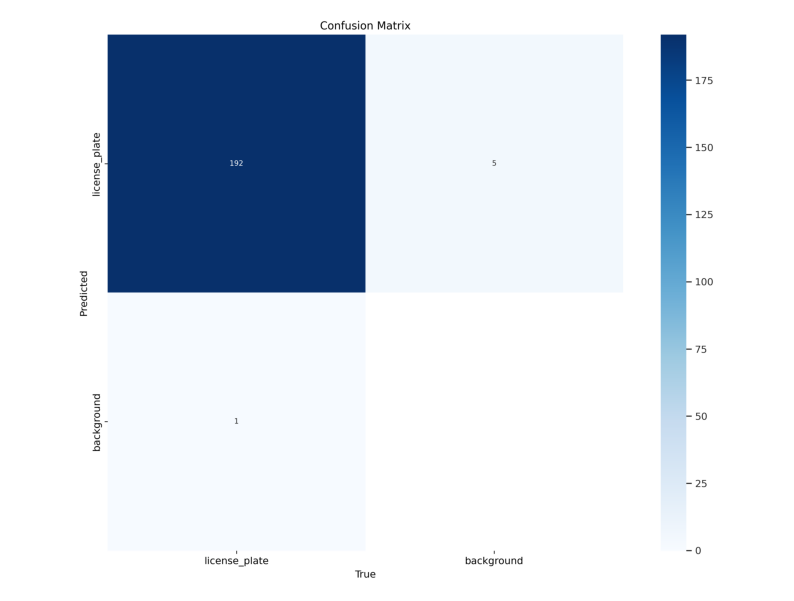

In [32]:
fig = plt.figure(figsize=(10, 9))
cm_img = mpimg.imread("/kaggle/working/runs/detect/val/confusion_matrix.png")
plt.imshow(cm_img)
plt.axis("off")
fig.show()

# Testing Curves

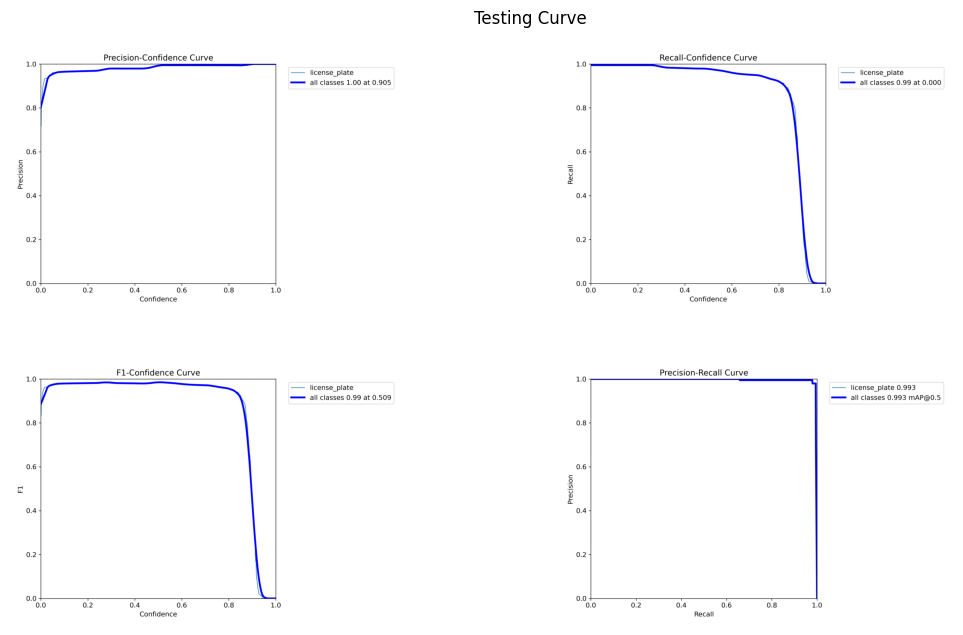

In [33]:
fig, axs = plt.subplots(2, 2, figsize=(13, 7.5))
curve_list = ["P_curve", "R_curve", "F1_curve", "PR_curve"]
for i, curve in enumerate(curve_list):
    curve_path = "/kaggle/working/runs/detect/val/{}.png".format(curve)
    curve_img = mpimg.imread(curve_path)
    axs[i//2, i%2].imshow(curve_img)
    axs[i//2, i%2].axis('off')
    
# Title
plt.suptitle("Testing Curve", x=0.55, y=0.93)

# Show
plt.show()

# Get bounding box predictions

In [34]:
df_results = df_test[["filename", "plate_number", "xmin", "ymin", "xmax", "ymax"]]
df_results = df_results.rename(columns={"filename": "image_path", "xmin": "x1_bbox", "ymin": "y1_bbox", "xmax": "x2_bbox", "ymax": "y2_bbox"})
df_results = df_results.reset_index(drop=True)
df_results

,image_path,plate_number,x1_bbox,y1_bbox,x2_bbox,y2_bbox
0,/kaggle/input/indian-vehicle-dataset/State-wis...,RJ20UB0137,101,261,171,275
1,/kaggle/input/indian-vehicle-dataset/State-wis...,HP34C8986,54,354,185,385
2,/kaggle/input/indian-vehicle-dataset/google_im...,GJ1KF1111,444,262,640,346
3,/kaggle/input/indian-vehicle-dataset/google_im...,RJ27TC0530,374,275,596,382
4,/kaggle/input/indian-vehicle-dataset/State-wis...,MH43X8997,94,222,183,239
...,...,...,...,...,...,...
188,/kaggle/input/indian-vehicle-dataset/State-wis...,GJ06KP8508,94,143,180,163
189,/kaggle/input/indian-vehicle-dataset/State-wis...,UP16U3849,169,347,266,384
190,/kaggle/input/indian-vehicle-dataset/State-wis...,WB06G4120,105,256,187,280
191,/kaggle/input/indian-vehicle-dataset/google_im...,KL20K7561,168,162,324,205


In [36]:
# # Get Bounding Box Predictions
from ultralytics import YOLO

yolo_model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')
bbox_results = yolo_model.predict(list(df_results["image_path"]), verbose=False)
all_box_list = []
all_conf_list = []
for bbox_result in bbox_results:
    boxes = bbox_result.boxes
    box_list = []
    conf_list = []
    for box in boxes:
        box_data = box.data[0][:4]
        box_data = [int(x) for x in box_data]
        conf = round(float(box.conf), 2)
        if(conf>=0.5):
            box_list.append(box_data)
            conf_list.append(conf)
    
    all_box_list.append(box_list)
    all_conf_list.append(conf_list)

# Get Bounding Box Predictions
# from ultralytics import YOLO
# import os

# yolo_model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')

# all_box_list = []
# all_conf_list = []
# bbox_results = []
# # Iterate through image paths and make predictions
# for image_path in list(df_results["image_path"]):
#     try:
#         bbox_result = yolo_model.predict(image_path, verbose=False)
#         bbox_results.append(bbox_result)
        
#         for bbox_result in bbox_results:
#             boxes = bbox_result.boxes
#             box_list = []
#             conf_list = []

#             for box in boxes:
#                 box_data = box.data[0][:4]
#                 box_data = [int(x) for x in box_data]
#                 conf = round(float(box.conf), 2)
#                 if conf >= 0.5:
#                     box_list.append(box_data)
#                     conf_list.append(conf)

#             all_box_list.append(box_list)
#             all_conf_list.append(conf_list)

#     except FileNotFoundError as e:
#         print(f"Error: {e}")
#         print(f"The file '{image_path}' does not exist. Skipping this file.")


In [37]:
df_results["pred_bbox"] = all_box_list
df_results["confidence"] = all_conf_list
df_results

,image_path,plate_number,x1_bbox,y1_bbox,x2_bbox,y2_bbox,pred_bbox,confidence
0,/kaggle/input/indian-vehicle-dataset/State-wis...,RJ20UB0137,101,261,171,275,"[[101, 260, 171, 273]]",[0.86]
1,/kaggle/input/indian-vehicle-dataset/State-wis...,HP34C8986,54,354,185,385,"[[54, 354, 185, 385]]",[0.88]
2,/kaggle/input/indian-vehicle-dataset/google_im...,GJ1KF1111,444,262,640,346,"[[444, 274, 638, 332]]",[0.85]
3,/kaggle/input/indian-vehicle-dataset/google_im...,RJ27TC0530,374,275,596,382,"[[375, 271, 598, 377]]",[0.89]
4,/kaggle/input/indian-vehicle-dataset/State-wis...,MH43X8997,94,222,183,239,"[[92, 221, 183, 239]]",[0.89]
...,...,...,...,...,...,...,...,...
188,/kaggle/input/indian-vehicle-dataset/State-wis...,GJ06KP8508,94,143,180,163,"[[95, 144, 180, 163]]",[0.9]
189,/kaggle/input/indian-vehicle-dataset/State-wis...,UP16U3849,169,347,266,384,"[[171, 347, 267, 382]]",[0.88]
190,/kaggle/input/indian-vehicle-dataset/State-wis...,WB06G4120,105,256,187,280,"[[104, 257, 187, 278]]",[0.88]
191,/kaggle/input/indian-vehicle-dataset/google_im...,KL20K7561,168,162,324,205,"[[168, 158, 324, 205]]",[0.9]


# Test images after detection

/kaggle/input/indian-vehicle-dataset/State-wise_OLX/HP/HP13.jpg


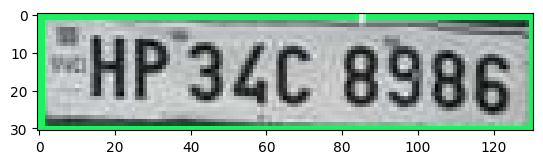

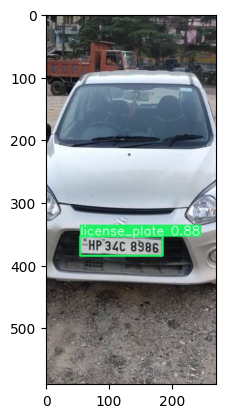

/kaggle/input/indian-vehicle-dataset/google_images/e1d7921f-5e58-46c7-b4f9-9fd4585508f1___IMG_9072.jpg.jpeg


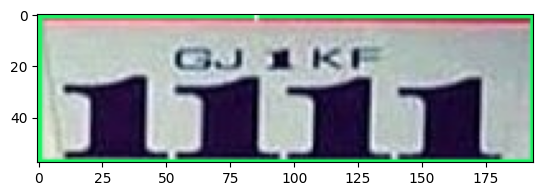

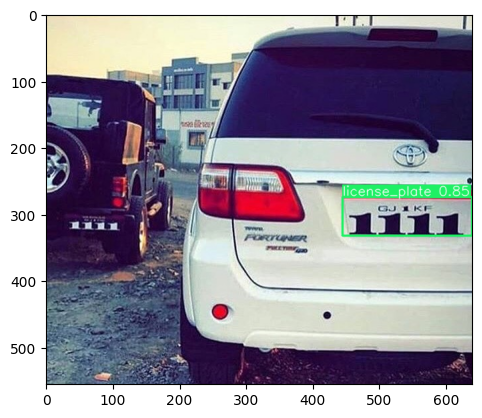

/kaggle/input/indian-vehicle-dataset/google_images/0850c175-0b8d-47f2-801c-e29f1dbdb367___3e7fd381-0ae5-4421-8a70-279ee0ec1c61_571.jpg


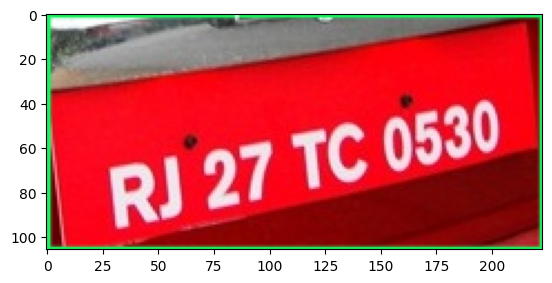

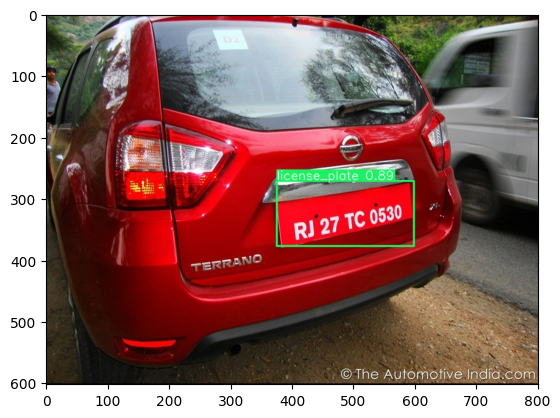

/kaggle/input/indian-vehicle-dataset/State-wise_OLX/MH/MH14.jpg


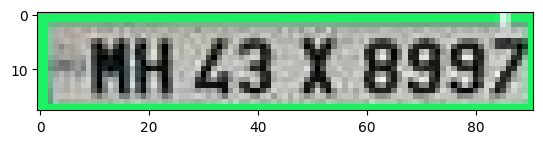

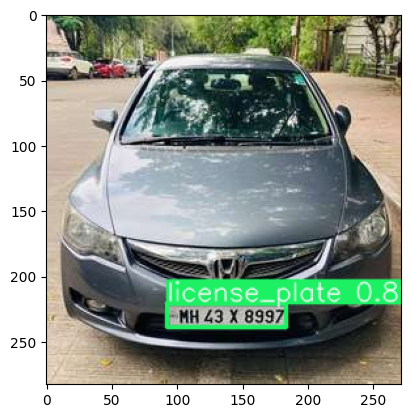

/kaggle/input/indian-vehicle-dataset/State-wise_OLX/PB/PB29.jpg


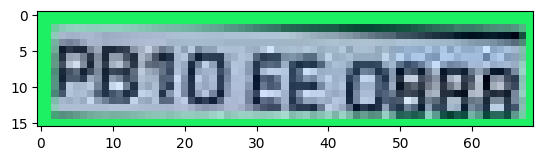

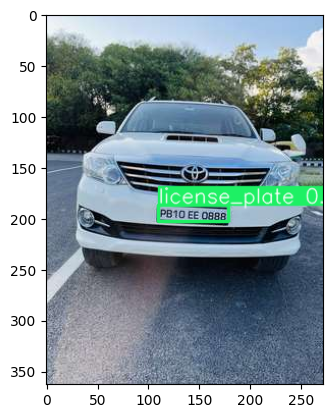

In [38]:
from ultralytics.utils.plotting import Annotator

def show_plate_detection(idx):
    # Original Image
    ori_path = df_results["image_path"][idx]
    print(ori_path)
    ori_image = cv2.imread(ori_path)
    ori_image = cv2.cvtColor(ori_image, cv2.COLOR_BGR2RGB)

    # Annotate Box
    annotator = Annotator(ori_image)
    boxes = df_results["pred_bbox"][idx]
    confs = df_results["confidence"][idx]
    for i, box in enumerate(boxes):
        annotator.box_label(box=box, label="license_plate " + (str(confs[i])), color=(30, 240, 100))

        # Get Plate Object
        x1, y1, x2, y2 = box
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
        roi = ori_image[y1:y2, x1:x2]
        plt.imshow(roi)
        plt.show()

    # Show Image
    frame = annotator.result()
    plt.imshow(frame)
    plt.show()

idxs = [1, 2, 3, 4, 5]
for idx in idxs:
    show_plate_detection(idx)

# Plate Recognition using PyTesseract

In [39]:
!pip install pytesseract

In [40]:
import pytesseract


def get_text_ocr(idx):
    ori_path = df_results["image_path"][idx]
    ori_image = cv2.imread(ori_path)
    ori_image = cv2.cvtColor(ori_image, cv2.COLOR_BGR2RGB)
    text_list = []
    bboxs = df_results["pred_bbox"][idx]
    for bbox in bboxs:
        # Crop Image with Bounding Box
        crop_image = ori_image[bbox[1]:bbox[3], bbox[0]:bbox[2]]
        
        resize_image = cv2.resize(crop_image, None, fx = 2, fy = 2, interpolation = cv2.INTER_CUBIC)
        
        grayscale_image = cv2.cvtColor(resize_image, cv2.COLOR_BGR2GRAY)
        
        gaussian_blur_image = cv2.GaussianBlur(grayscale_image, (5, 5), 0)
        
        # Extract Plate Number
        result = pytesseract.image_to_string(gaussian_blur_image, lang ='eng', config ='--oem 3 --psm 7 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789')
        text_output = "".join(result.split()).replace(":", "").replace("-", "")
        text_output = text_output.strip()
        if(len(text_output)>0):
            
            # Clean Text
            del_punc_list = [" ", "·", ":", "-", "_"]
            clean_text = re.sub(r"[ ·:-]", "", text_output)
#             clean_text = clean_text.replace("O", "0")
#             clean_text = clean_text.replace("I", "1")
            clean_text = clean_text.upper()
            text_list.append(clean_text)
            
    return text_list

# Get plate predictions

In [41]:
!pip install onnxruntime
import re
idxs = list(np.arange(0, 193))
text_results = tqdm([get_text_ocr(idx) for idx in idxs])
text_results = [text[0] if len(text)>0 else "" for text in text_results]
df_results["pred_plate_number"] = text_results
df_results

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 58.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 6.2 MB/s eta 0:00:00


100%|██████████| 193/193 [00:00<00:00, 416409.81it/s]


,image_path,plate_number,x1_bbox,y1_bbox,x2_bbox,y2_bbox,pred_bbox,confidence,pred_plate_number
0,/kaggle/input/indian-vehicle-dataset/State-wis...,RJ20UB0137,101,261,171,275,"[[101, 260, 171, 273]]",[0.86],RI2OUSO137
1,/kaggle/input/indian-vehicle-dataset/State-wis...,HP34C8986,54,354,185,385,"[[54, 354, 185, 385]]",[0.88],HP34C8986
2,/kaggle/input/indian-vehicle-dataset/google_im...,GJ1KF1111,444,262,640,346,"[[444, 274, 638, 332]]",[0.85],
3,/kaggle/input/indian-vehicle-dataset/google_im...,RJ27TC0530,374,275,596,382,"[[375, 271, 598, 377]]",[0.89],PP
4,/kaggle/input/indian-vehicle-dataset/State-wis...,MH43X8997,94,222,183,239,"[[92, 221, 183, 239]]",[0.89],MH43X8997
...,...,...,...,...,...,...,...,...,...
188,/kaggle/input/indian-vehicle-dataset/State-wis...,GJ06KP8508,94,143,180,163,"[[95, 144, 180, 163]]",[0.9],GJO6KP8508
189,/kaggle/input/indian-vehicle-dataset/State-wis...,UP16U3849,169,347,266,384,"[[171, 347, 267, 382]]",[0.88],P
190,/kaggle/input/indian-vehicle-dataset/State-wis...,WB06G4120,105,256,187,280,"[[104, 257, 187, 278]]",[0.88],0664120
191,/kaggle/input/indian-vehicle-dataset/google_im...,KL20K7561,168,162,324,205,"[[168, 158, 324, 205]]",[0.9],KL20K7561


/kaggle/input/indian-vehicle-dataset/State-wise_OLX/HP/HP13.jpg


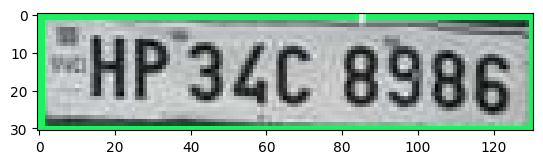

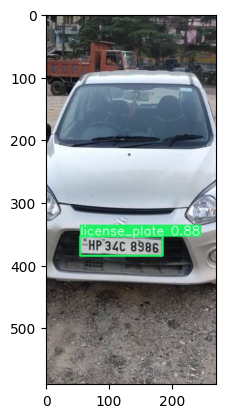

['HP34C8986']
/kaggle/input/indian-vehicle-dataset/State-wise_OLX/MH/MH14.jpg


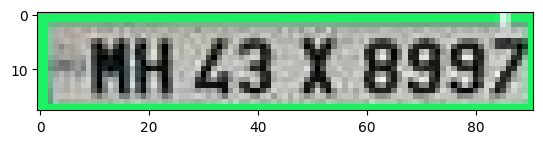

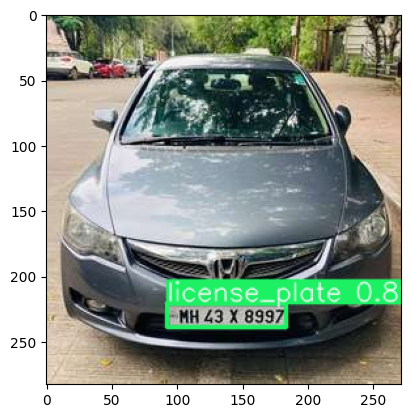

['MH43X8997']
/kaggle/input/indian-vehicle-dataset/State-wise_OLX/AS/AS5.jpg


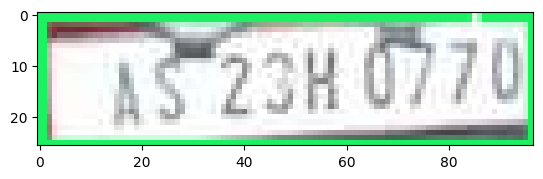

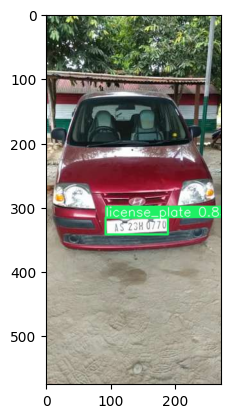

['PS23H0770']
/kaggle/input/indian-vehicle-dataset/State-wise_OLX/JK/JK16.jpg


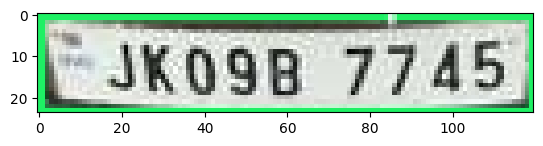

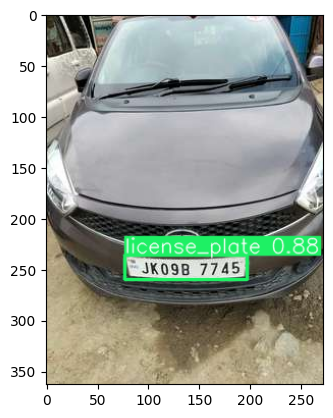

['JKO9B7745']
/kaggle/input/indian-vehicle-dataset/State-wise_OLX/WB/WB23.jpg


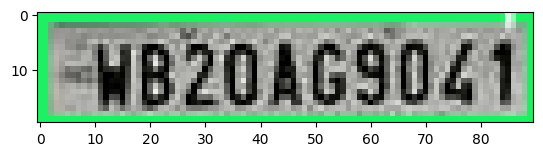

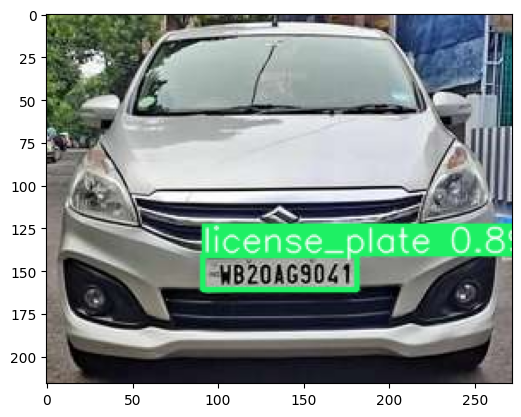

['WB20AG9041']


In [44]:
%matplotlib inline
idxs = [1, 4, 7, 8, 10]
for idx in idxs:
    show_plate_detection(idx)
    text_ocr = get_text_ocr(idx)
    print(text_ocr)